In [1]:
import scripts.framework as fr

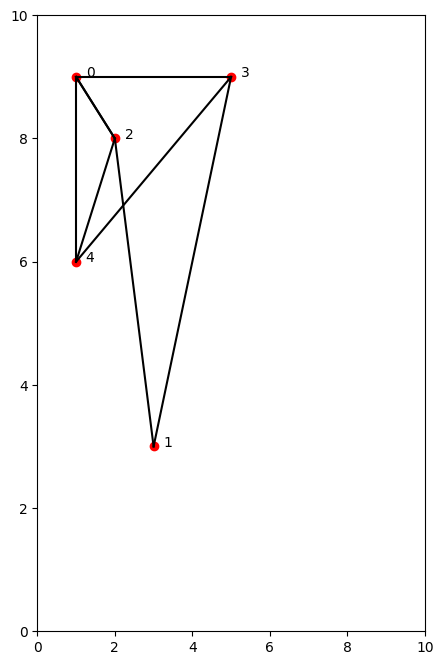

In [5]:
# repr = fr.Representation("./data/nodes_sp.csv", "./data/edges_sp.csv", maptype="sp")
repr = fr.Representation("./data/nodes_test.csv", "./data/edges_test.csv", maptype="test")
repr.plot_map(plot_nodes=True)

In [3]:
for edge in repr.edges:
    print(edge)
for id, node in repr.nodes.items():
    print(node)

Edge from node 0 to node 2
Edge from node 0 to node 3
Edge from node 0 to node 4
Edge from node 2 to node 1
Edge from node 3 to node 1
Edge from node 4 to node 2
Edge from node 2 to node 0
Edge from node 3 to node 4
Node 0 at (0.0, 0.0)
Node 1 at (3.0, 7.0)
Node 2 at (2.0, 2.0)
Node 3 at (5.0, 1.0)
Node 4 at (0.0, 4.0)
